## Time series of glacial and continental river contributions across boundaries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
from matplotlib.ticker import FormatStrFormatter
import warnings
import os 
from datetime import date
warnings.filterwarnings('ignore')

%matplotlib inline

##### Parameters:

In [2]:
# Domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# Time series folders:
folder_ref   = '/ocean/brogalla/GEOTRACES/time-series/Mn-set4-202004/'
folder_riv2a = '/ocean/brogalla/GEOTRACES/time-series/riv-2a-202005/'
folder_riv2b = '/ocean/brogalla/GEOTRACES/time-series/riv-2b-202005/'

# Set boundary coordinates:
l1i = 2013-imin;                      l1j = np.arange(300-jmin,392-jmin)
l2i = 1935-imin;                      l2j = np.arange(450-jmin,530-jmin)
l3i = np.arange(1850-imin,1885-imin); l3j = 555-jmin
l4i = np.arange(1753-imin,1837-imin); l4j = 568-jmin
l5i = np.arange(1720-imin,1790-imin); l5j = 605-jmin
l6i = 1730-imin;                      l6j = np.arange(660-jmin,690-jmin)
t1i = np.arange(1635-imin,1653-imin); t1j = 760-jmin
r1i = 1520-imin;                      r1j = np.arange(505-jmin,673-jmin)
r2i = 1520-imin;                      r2j = np.arange(385-jmin,405-jmin)
N1i = np.arange(1570-imin,1630-imin); N1j = 635-jmin #Nares
P1i = 1585-imin;                      P1j = np.arange(485-jmin,538-jmin)  #Parry channel

# Colours for the boundaries:
bdy_colours  = ['#386c82','#6e8bce','#992622','#36ab92','#085965','#ce9169']

##### Load files:

In [3]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:])

mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12-EXH006_5d_gridT_y2002m01d05.nc')
lons  = np.array(mesh.variables['nav_lon'])
lats  = np.array(mesh.variables['nav_lat'])
tmask = tmask[0,:,imin:imax,jmin:jmax]

In [4]:
ref   = nc.Dataset('/data/brogalla/run_storage/Mn-set4-202004/ref-2003/ANHA12_EXH006_2003_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

##### Functions:

In [5]:
def time_series_pickle(year, riv_2a=False, riv_2b=False):
    
    # Load calculated time series of fluxes:
    if riv_2a:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 =  \
                                pickle.load(open(folder_riv2a+'time-series-'+str(year)+'.pickle','rb'))  
    elif riv_2b:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 =  \
                                pickle.load(open(folder_riv2b+'time-series-'+str(year)+'.pickle','rb'))  
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 =  \
                                pickle.load(open(folder_ref+'time-series-'+str(year)+'.pickle','rb'))
    
    # Conservation of volume check:
    sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
           (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
            np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
#     print('Total volume change at end of time period: ', np.sum(sum_V))
    
    # Combine western CAA time series:
    time_series_mn_WCAA = np.sum(np.sum(time_series_mn3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn6,axis=2),axis=1)
    time_series_V_WCAA = np.sum(np.sum(time_series_V3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V6,axis=2),axis=1)
    
    return time_series_mn1, time_series_mn2, time_series_mn_WCAA, time_series_mn7, time_series_mn8, \
            time_series_mn9, time_series_mn10, time_series_mn11

In [6]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1 = np.sort(os.listdir('/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

In [7]:
def calculate_fluxes(year, Baffin, Nares, Parry):
    ts_ref1, ts_ref2, ts_ref_WCAA, ts_ref7, ts_ref8, ts_ref9, ts_ref10, ts_ref11 = time_series_pickle(year)
    ts_2a1, ts_2a2, ts_2a_WCAA, ts_2a7, ts_2a8, ts_2a9, ts_2a10, ts_2a11 = time_series_pickle(year, riv_2a=True)
    ts_2b1, ts_2b2, ts_2b_WCAA, ts_2b7, ts_2b8, ts_2b9, ts_2b10, ts_2b11 = time_series_pickle(year, riv_2b=True)
    
    if Baffin:
        # Baffin Bay:
        cumsum_BB_ref = np.cumsum(np.sum(np.sum(-1*ts_ref8, axis=2), axis=1))
        cumsum_BB_riv = np.cumsum(np.sum(np.sum(-1*ts_2a8,  axis=2), axis=1))
        cumsum_BB_con = np.cumsum(np.sum(np.sum(-1*ts_2b8,  axis=2), axis=1))
        
        return cumsum_BB_ref, cumsum_BB_riv, cumsum_BB_con
        
    if Parry:
        # Parry Channel:
        cumsum_Pout_ref = np.cumsum(np.sum(np.sum(-1*ts_ref11, axis=2), axis=1))
        cumsum_Pout_riv = np.cumsum(np.sum(np.sum(-1*ts_2a11,  axis=2), axis=1))
        cumsum_Pout_con = np.cumsum(np.sum(np.sum(-1*ts_2b11,  axis=2), axis=1))
        cumsum_Pin_ref  = np.cumsum(np.sum(np.sum(-1*ts_ref2, axis=2), axis=1))
        cumsum_Pin_riv  = np.cumsum(np.sum(np.sum(-1*ts_2a2,  axis=2), axis=1))
        cumsum_Pin_con  = np.cumsum(np.sum(np.sum(-1*ts_2b2,  axis=2), axis=1))

#         cumsum_Parry_ref = -cumsum_Pin_ref + cumsum_Pout_ref
#         cumsum_Parry_riv = -cumsum_Pin_riv + cumsum_Pout_riv
#         cumsum_Parry_con = -cumsum_Pin_con + cumsum_Pout_con
        
        cumsum_Parry_ref = cumsum_Pout_ref
        cumsum_Parry_riv = cumsum_Pout_riv
        cumsum_Parry_con = cumsum_Pout_con
        
        return cumsum_Parry_ref, cumsum_Parry_riv, cumsum_Parry_con
    
    if Nares:
        # Nares Strait:
        cumsum_Nout_ref = np.cumsum(np.sum(np.sum(-1*ts_ref10, axis=2), axis=1))
        cumsum_Nout_riv = np.cumsum(np.sum(np.sum(-1*ts_2a10,  axis=2), axis=1))
        cumsum_Nout_con = np.cumsum(np.sum(np.sum(-1*ts_2b10,  axis=2), axis=1))
        cumsum_Nin_ref  = np.cumsum(np.sum(np.sum(-1*ts_ref7,  axis=2), axis=1))
        cumsum_Nin_riv  = np.cumsum(np.sum(np.sum(-1*ts_2a7,  axis=2), axis=1))
        cumsum_Nin_con  = np.cumsum(np.sum(np.sum(-1*ts_2b7,  axis=2), axis=1))

#         cumsum_Nares_ref  = -cumsum_Nin_ref + cumsum_Nout_ref
#         cumsum_Nares_riv  = -cumsum_Nin_riv + cumsum_Nout_riv
#         cumsum_Nares_con  = -cumsum_Nin_con + cumsum_Nout_con
        cumsum_Nares_ref = cumsum_Nout_ref
        cumsum_Nares_riv = cumsum_Nout_riv
        cumsum_Nares_con = cumsum_Nout_con
        
        return cumsum_Nares_ref, cumsum_Nares_riv, cumsum_Nares_con

In [8]:
def calculate_proportion(cumsum_ref, cumsum_riv, cumsum_con):
      
    # Proportional contributions:
    riv_prop    = np.divide(cumsum_riv - cumsum_ref, cumsum_ref)*100
    con_prop    = np.divide(cumsum_con - cumsum_ref, cumsum_ref)*100
                
    return riv_prop, con_prop

In [9]:
def plot_fluxes(start_year, end_year, Baffin=False, Nares=False, Parry=False, savefig=False, amin=0, amax=6.5):
    
    st = sns.axes_style("whitegrid")
    
    with st:
        fig, ax = plt.subplots(1,1, figsize=(8,4))
        
        # Flux at the end of the previous year:
        prev_year_ref = 0; prev_year_riv = 0; prev_year_con = 0; 
        
        for year in range(start_year, end_year+1):
            # Calculate volume and Mn fluxes
            ref, riv, con = calculate_fluxes(year, Baffin, Nares, Parry)
            cumsum_ref    = prev_year_ref + ref
            cumsum_riv    = prev_year_riv + riv
            cumsum_con    = prev_year_con + con
            prev_year_ref = cumsum_ref[-1]
            prev_year_riv = cumsum_riv[-1]
            prev_year_con = cumsum_con[-1]
            
            # Calculate proportion:
            riv_prop, con_prop = calculate_proportion(cumsum_ref, cumsum_riv, cumsum_con)
            dates_year         = file_dates(year)
            print('Year: ', year, '----------------------------------------')
            print('Average glacial proportion:     ', '{:.2f}'.format(np.mean(riv_prop)))
            print('Average continental proportion: ', '{:.2f}'.format(np.mean(con_prop)))
            
            # Plot lines:
            sns.lineplot(dates_year, riv_prop, linewidth=4.5, color=bdy_colours[3], ax=ax)
            sns.lineplot(dates_year, con_prop, linewidth=4.5, color=bdy_colours[5], ax=ax)

        # Figure settings:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set(ylim=(amin, amax), xlim=(dt.datetime(2002,1,1), dt.datetime(2020,1,1)))
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Contribution to Mn flux [%]', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
        ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
        ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
        ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');

    # Choose whether or not to save the figure
    if savefig:
        if Baffin:
            fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R1-time-series-Baffin-'+ \
                str(date.today().strftime('%Y%m%d'))+'.png', bbox_inches='tight', dpi=300)
        if Nares:
            fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R1-time-series-Nares-'+ \
                str(date.today().strftime('%Y%m%d'))+'.png', bbox_inches='tight', dpi=300)
        if Parry:
            fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R1-time-series-Parry-'+ \
                str(date.today().strftime('%Y%m%d'))+'.png', bbox_inches='tight', dpi=300)
    
    return

##### Figures:

Time series across boundaries
- Positive --- into domain
- Negative --- out of domain

Year:  2002 ----------------------------------------
Average glacial proportion:      1.82
Average continental proportion:  1.12
Year:  2003 ----------------------------------------
Average glacial proportion:      1.99
Average continental proportion:  1.30
Year:  2004 ----------------------------------------
Average glacial proportion:      2.08
Average continental proportion:  1.49
Year:  2005 ----------------------------------------
Average glacial proportion:      2.14
Average continental proportion:  1.70
Year:  2006 ----------------------------------------
Average glacial proportion:      2.17
Average continental proportion:  1.75
Year:  2007 ----------------------------------------
Average glacial proportion:      2.23
Average continental proportion:  1.71
Year:  2008 ----------------------------------------
Average glacial proportion:      2.31
Average continental proportion:  1.64
Year:  2009 ----------------------------------------
Average glacial proportion:      2.37
Averag

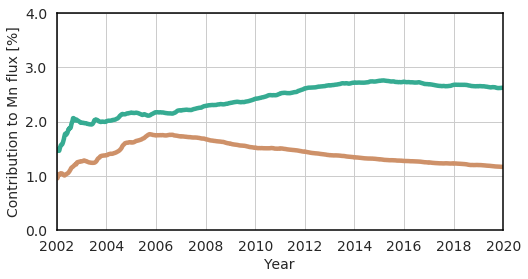

In [10]:
plot_fluxes(2002, 2019, amin=0, amax=4, Baffin=True, savefig=True)

Year:  2002 ----------------------------------------
Average glacial proportion:      0.24
Average continental proportion:  1.87
Year:  2003 ----------------------------------------
Average glacial proportion:      0.25
Average continental proportion:  2.06
Year:  2004 ----------------------------------------
Average glacial proportion:      0.22
Average continental proportion:  2.44
Year:  2005 ----------------------------------------
Average glacial proportion:      0.19
Average continental proportion:  2.72
Year:  2006 ----------------------------------------
Average glacial proportion:      0.17
Average continental proportion:  2.77
Year:  2007 ----------------------------------------
Average glacial proportion:      0.19
Average continental proportion:  2.74
Year:  2008 ----------------------------------------
Average glacial proportion:      0.20
Average continental proportion:  2.65
Year:  2009 ----------------------------------------
Average glacial proportion:      0.21
Averag

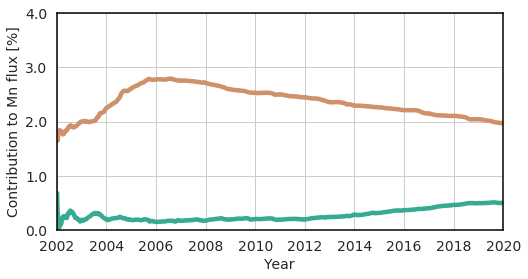

In [11]:
plot_fluxes(2002, 2019, amin=0, amax=4, Parry=True, savefig=True)

Year:  2002 ----------------------------------------
Average glacial proportion:      1.59
Average continental proportion:  0.04
Year:  2003 ----------------------------------------
Average glacial proportion:      1.87
Average continental proportion:  0.04
Year:  2004 ----------------------------------------
Average glacial proportion:      2.00
Average continental proportion:  0.04
Year:  2005 ----------------------------------------
Average glacial proportion:      2.08
Average continental proportion:  0.05
Year:  2006 ----------------------------------------
Average glacial proportion:      2.14
Average continental proportion:  0.04
Year:  2007 ----------------------------------------
Average glacial proportion:      2.21
Average continental proportion:  0.03
Year:  2008 ----------------------------------------
Average glacial proportion:      2.26
Average continental proportion:  0.03
Year:  2009 ----------------------------------------
Average glacial proportion:      2.34
Averag

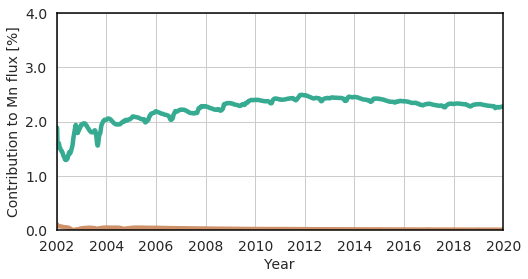

In [12]:
plot_fluxes(2002, 2019, Nares=True, amin=0, amax=4, savefig=True)

The time series are very similar so far for Parry Channel and Baffin Bay, however, there's a big difference for Nares Strait in the first two years(much larger than before). The only difference that I can think of in terms of running is that I'm spinning up for longer than I was previously... Maybe I'm using different Greenland melt runoff files than before?

For Parry Channel, previously spike at start as well, then a gradual increase from 4% in 2004 to 7% in 2018.